In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('comentarios.csv')

df['comentario'] = df['comentario'].astype(str)

df.head()

,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_comentario'] = df['comentario'].apply(clean_text)

df[['comentario', 'cleaned_comentario']].head()

,comentario,cleaned_comentario
0,"Partido equilibrado, resultado justo.",partido equilibrado resultado justo
1,"Encuentro equilibrado, reparto justo de puntos.",encuentro equilibrado reparto justo de puntos
2,Resultado esperado dadas las circunstancias.,resultado esperado dadas las circunstancias
3,Nuestro ataque no generó peligro suficiente.,nuestro ataque no generó peligro suficiente
4,"Sin sobresaltos, rendimiento promedio.",sin sobresaltos rendimiento promedio


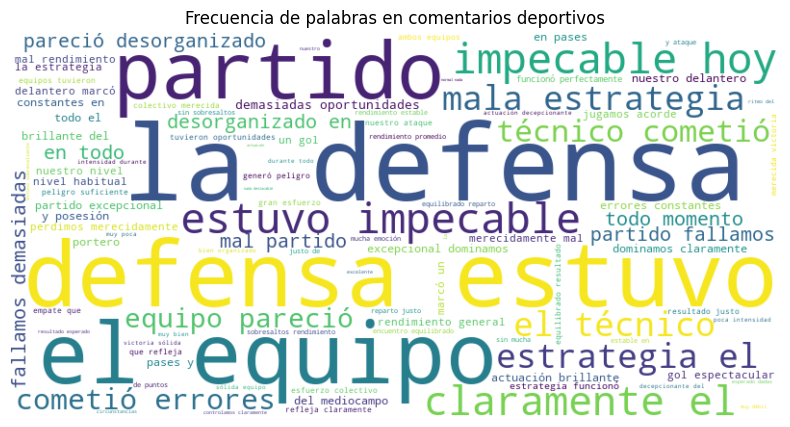

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_filtered = df[df['cleaned_comentario'].str.strip().astype(bool)]

total_text = ' '.join(df_filtered['cleaned_comentario'])

if total_text:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(total_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Frecuencia de palabras en comentarios deportivos')
    plt.savefig('wordcloud.png', bbox_inches='tight')
    plt.show()
else:
    print("No valid comments to generate a word cloud.")

C:\Users\jaayg\AppData\Local\Temp\ipykernel_10860\3881190423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimiento', palette='viridis')


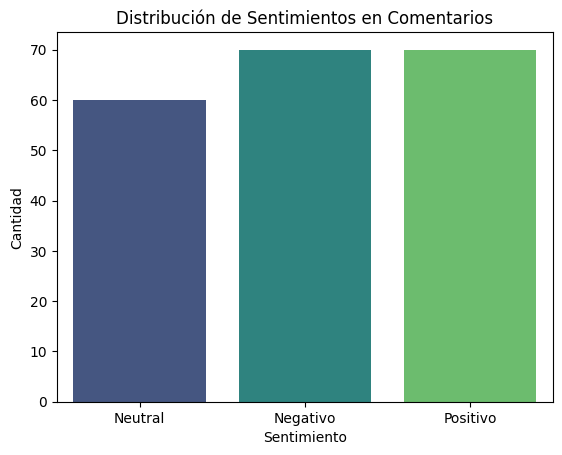

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'sentimiento' in df.columns:
    sns.countplot(data=df, x='sentimiento', palette='viridis')
    plt.title('Distribución de Sentimientos en Comentarios')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("No 'sentimiento' column found in the DataFrame to plot.")

In [11]:
import ipywidgets as widgets
from IPython.display import display

sentimiento_widget = widgets.Dropdown(
    options=df['sentimiento'].unique(),
    description='Sentimiento:'
)

def show_comment(sentimiento):
    filtered_comments = df[df['sentimiento'] == sentimiento]
    display(filtered_comments[['comentario', 'cleaned_comentario']].sample(5))

widgets.interactive(show_comment, sentimiento=sentimiento_widget)

interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…